# Facial Similarity <a name="top"></a>

Often instead of just checking if two faces match or not (True or False), it's helpful to see how similar they are.

You can do that by using the `face_distance` function.

The model was trained in a way such that faces with a distance of 0.6 or less should be a match. But if you want to be more strict, you can look for a smaller face distance. For example, using a 0.55 cutoff would reduce false positive matches at the risk of more false negatives.

**Note**: This isn't exactly the same as a "percent match". The scale isn't linear. But you can assume that images with a smaller distance are more similar to each other than ones with a larger distance.

Useful Reference: https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/

- [Dlib](#dlib)
- [FaceNet](#facenet)

## Dlib <a name="dlib"></a>

[Back to top](#top)

In [17]:
import face_recognition
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import os

In [2]:
# Load some images to compare against
known_biden_image_1 = face_recognition.load_image_file("../images/joe_biden_1.jpg")
known_biden_image_2 = face_recognition.load_image_file("../images/joe_biden_2.jpg")

In [3]:
# Get the face encodings for the known images
biden_face_encoding_1 = face_recognition.face_encodings(known_biden_image_1)[0]
biden_face_encoding_2 = face_recognition.face_encodings(known_biden_image_2)[0]

known_encodings = [
    biden_face_encoding_1,
    biden_face_encoding_2
]

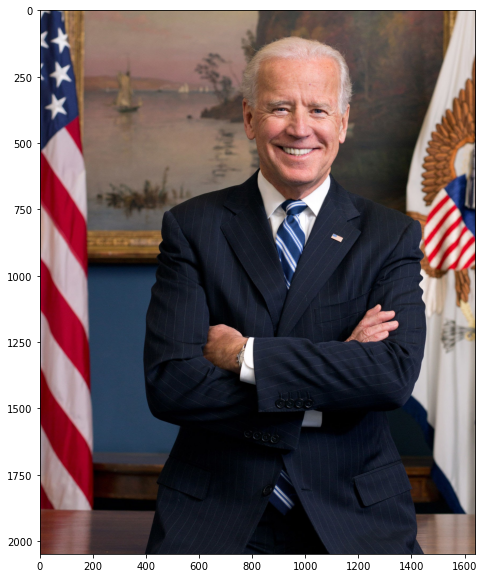

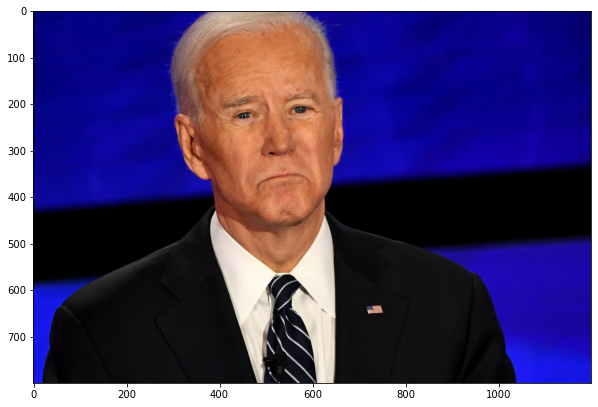

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(known_biden_image_1)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(known_biden_image_2)
plt.show()

In [5]:
# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("../images/joe_biden_1.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

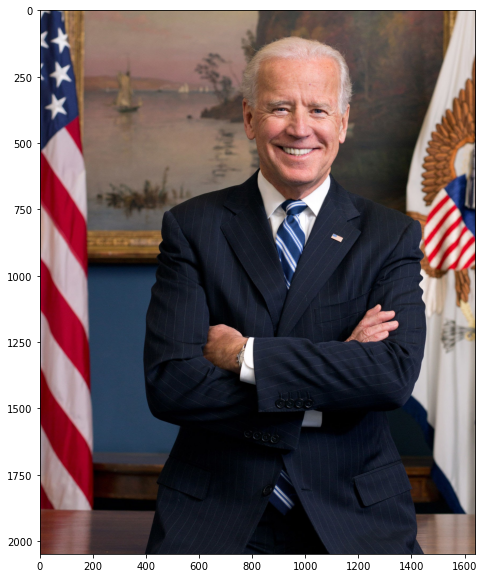

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(image_to_test)
plt.show()

In [7]:
# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

print(face_distances)

[0.         0.46048388]


In [8]:
for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.0 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.46 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True



## Check if resizing the image affects the similarity score

In [12]:
import cv2

In [13]:
# Load some images to compare against
known_biden_image_1 = face_recognition.load_image_file("../images/joe_biden_1.jpg")
known_biden_image_2 = face_recognition.load_image_file("../images/joe_biden_2.jpg")

In [17]:
(h,w) = known_biden_image_2.shape[:2]

NEW_WIDTH = 500
NEW_HEIGHT = int(h * (NEW_WIDTH / float(w)))
resized_known_biden_image_2 = cv2.resize(known_biden_image_2, (NEW_WIDTH, NEW_HEIGHT))

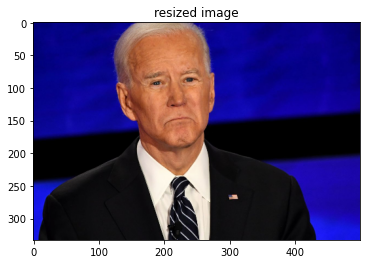

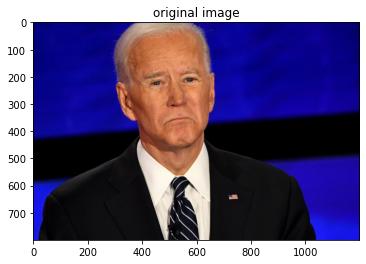

In [21]:
plt.imshow(resized_known_biden_image_2)
plt.title("resized image")
plt.show()

plt.imshow(known_biden_image_2)
plt.title("original image")
plt.show()

In [37]:
original_face_encoding = face_recognition.face_encodings(known_biden_image_2, known_face_locations=None, num_jitters=1, model="large")[0]
resized_face_encoding = face_recognition.face_encodings(resized_known_biden_image_2, known_face_locations=None, num_jitters=1, model="large")[0]

In [38]:
# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(original_face_encoding, [resized_face_encoding])

print(face_distances)

[0.06281071]


In [29]:
resized_face_encoding.shape

(128,)

In [28]:
original_face_encoding.shape

(128,)

## Perform facial detection first then perform facial similarity

In [39]:
face_locations = face_recognition.face_locations(known_biden_image_2)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

I found 1 face(s) in this photograph.


A face is located at pixel location Top: 142, Left: 379, Bottom: 409, Right: 646


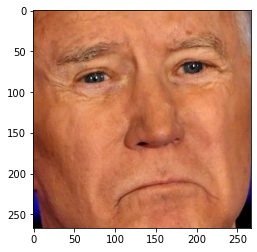

In [40]:
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = known_biden_image_2[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()

In [41]:
original_face_encoding = face_recognition.face_encodings(known_biden_image_2, known_face_locations=None, num_jitters=1, model="large")[0]
face_only_encoding = face_recognition.face_encodings(face_image, known_face_locations=None, num_jitters=1, model="large")[0]

In [42]:
# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(original_face_encoding, [resized_face_encoding])

print(face_distances)

[0.06281071]


## Facial Similarity of 2 identical image with no faces

In [48]:
# Load some images to compare against
ditto_image = face_recognition.load_image_file("../images/many-asian-male-faces.jpg")

In [45]:
# Get the face encodings for the known images
ditto_encoding = face_recognition.face_encodings(ditto_image)[0]

known_encodings = [
    ditto_encoding,
]

IndexError: list index out of range

In [50]:
hi = face_recognition.face_encodings(ditto_image)

In [54]:
print(f"{len(hi)} faces found")

16 faces found


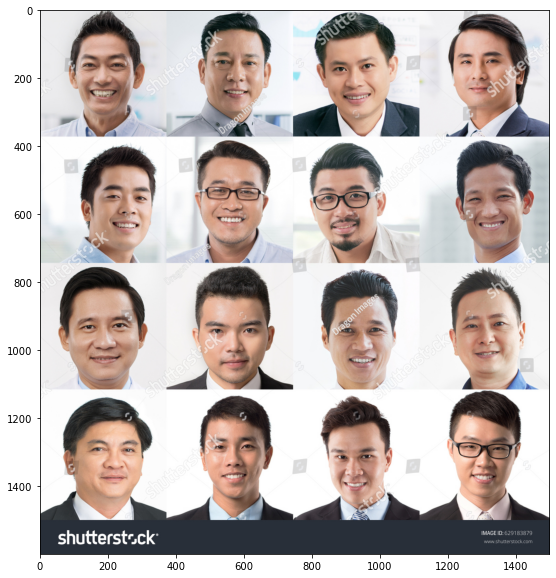

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(ditto_image)
plt.show()

In [88]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("../images/many-asian-male-faces.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image, model='large')

pil_image = Image.fromarray(np.ones_like(image) * 255)
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGB')
    
    for face_landmark in face_landmarks:
        d.line(face_landmarks[face_landmark], fill=(0, 0, 0))
        
pil_image.show(title="face outline(s)")



faces_image = np.ones_like(image) * 255

for face_location in face_locations:    
    top, right, bottom, left = face_location
    faces_image[top:bottom, left:right] = image[top:bottom, left:right]
    
pil_image = Image.fromarray(faces_image)
pil_image.show(title="face")

In [22]:
import torch
torch.__version__

'1.9.0+cpu'

In [82]:
face_locations = face_recognition.face_locations(image)

In [86]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("../images/many-asian-male-faces.jpg")

In [101]:
def calc_face_distance(image_path_1, image_path_2):
    image_1 = face_recognition.load_image_file(image_path_1)
    image_2 = face_recognition.load_image_file(image_path_2)

    # Get the face encodings for the images
    face_encoding_1 = face_recognition.face_encodings(image_1)
    face_encoding_2 = face_recognition.face_encodings(image_2)
    
    # calculate no. of faces found
    num_faces_1 = len(face_encoding_1)
    num_faces_2 = len(face_encoding_2)
    
    print(f"{num_faces_1} face(s) found in {image_path_1}.")
    print(f"{num_faces_2} face(s) found in {image_path_2}.")
    
    # if a single face is found in both images, then calculate similarity score
    if num_faces_1 == 1 and num_faces_2 == 1:
        face_distances = face_recognition.face_distance([face_encoding_1[0]], face_encoding_2[0])
        return 1 - face_distances
    
    else:
        return None
    
face_similarity = calc_face_distance("../images/ditto.png", "../images/joe_biden_1.jpg")
print(face_similarity)

0 face(s) found in ../images/ditto.png.
1 face(s) found in ../images/joe_biden_1.jpg.
None


In [20]:
IMAGE_DIR = '../images'

column_names = []

for person_name in os.listdir(IMAGE_DIR):
    for image_path in os.listdir(IMAGE_DIR + '/' + person_name):
        column_names.append(person_name + '/' + image_path)

face_similarity_dlib_df = pd.DataFrame({k: [np.nan] * len(column_names) for k in column_names})
face_similarity_dlib_df.index = column_names
face_similarity_dlib_df

,ariana_grande/ariana_grande_1.jpeg,ariana_grande/ariana_grande_2.png,cellist_laufey/00001.jpg,cellist_laufey/00020.jpg,cellist_laufey/00067.jpg,cellist_laufey/00390.jpg,cellist_laufey/00634.jpg,guitarist_andrew_foy/00001.jpg,guitarist_andrew_foy/00100.jpg,guitarist_andrew_foy/00248.jpg,...,youtuber_steven_he/00075.jpg,youtuber_steven_he/00112.jpg,youtuber_steven_he/00266.jpg,youtuber_steven_he/00389.jpg,youtuber_steven_he/00453.jpg,youtuber_steven_he/00767.jpg,youtuber_steven_he/00775.jpg,youtuber_steven_he/00962.jpg,youtuber_steven_he/01145.jpg,youtuber_steven_he/01432.jpg
ariana_grande/ariana_grande_1.jpeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ariana_grande/ariana_grande_2.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellist_laufey/00001.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellist_laufey/00020.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellist_laufey/00067.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youtuber_steven_he/00767.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
youtuber_steven_he/00775.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
youtuber_steven_he/00962.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
youtuber_steven_he/01145.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pd.__version__

'1.3.5'

In [15]:
for i in range(len(face_similarity_dlib_df)):
    pass

['ariana_grande/ariana_grande_1.jpeg',
 'ariana_grande/ariana_grande_2.png',
 'cellist_laufey/00001.jpg',
 'cellist_laufey/00020.jpg',
 'cellist_laufey/00067.jpg',
 'cellist_laufey/00390.jpg',
 'cellist_laufey/00634.jpg',
 'guitarist_andrew_foy/00001.jpg',
 'guitarist_andrew_foy/00100.jpg',
 'guitarist_andrew_foy/00248.jpg',
 'guitarist_andrew_foy/00690.jpg',
 'guitarist_huang_xiao_xiang/00112.jpg',
 'guitarist_huang_xiao_xiang/00508.jpg',
 'guitarist_huang_xiao_xiang/04057.jpg',
 'guitarist_sungha_jung/00431.jpg',
 'guitarist_sungha_jung/00487.jpg',
 'guitarist_sungha_jung/00536.jpg',
 'guitarist_sungha_jung/00600.jpg',
 'guitarist_sungha_jung/00697.jpg',
 'guitarist_sungha_jung/00732.jpg',
 'guitarist_sungha_jung/00865.jpg',
 'guitarist_sungha_jung/00893.jpg',
 'guitarist_sungha_jung/01088.jpg',
 'hunter_biden/hunter_biden.jpg',
 'influencer_daniel_tamago/00327.jpg',
 'influencer_daniel_tamago/00345.jpg',
 'influencer_daniel_tamago/00430.jpg',
 'influencer_daniel_tamago/00525.jpg',
 

In [11]:
face_similarity_dlib_df

""


## FaceNet <a name="facenet"></a>

- [For two images](#two-images)
- [For multiple images](#multiple-images)

[Back to top](#top)

### FaceNet for two images <a name="two-images"></a>

[Back to top](#top)

In [64]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
from PIL import Image

workers = 0 if os.name == 'nt' else 4

def distance(embeddings1, embeddings2, distance_metric='euclidean'):
    '''
    Distance metric for 2 embedding vectors.
    
    :param embeddings1: first embedding, shape of 1 x N
    :type embeddings1: numpy.ndarray

    :param embeddings2: second embedding, shape of 1 x N
    :type embeddings2: numpy.ndarray
    
    :param distance_metric: the distance metric to use to compare similarity
        between two embedding vectors.
    :type distance_metric: str
    
    :return dist: distance between the embedding vectors based on the selected distance metric
    :rtype dist: float
    '''

    if distance_metric=='euclidean':
        # Euclidian distance
        dist = np.linalg.norm(embeddings1 - embeddings2)
    
    elif distance_metric=='cosine':
        # Distance based on cosine similarity
        dot = np.sum(np.multiply(embeddings1, embeddings2))
        norm = np.linalg.norm(embeddings1) * np.linalg.norm(embeddings2)
        similarity = dot / norm
        
        # to round down for round-off errors where `similarity = 1.00001`
        if similarity > 1:
            similarity = 1
        if similarity < -1:
            similarity = -1
        
        dist = np.arccos(similarity) / math.pi
    else:
        raise f"Undefined distance metric: {distance_metric}"

    return dist


def face_similarity_two_img(image_path_1, image_path_2):

    embeddings = []

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('Running on device: {}'.format(device))

    # for detecting bounding box for face(s)
    mtcnn = MTCNN(
        image_size=160, margin=0, min_face_size=20,
        thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
        keep_all=True, device=device
    )

    # for generating embeddings for a face image
    resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

    for i in range(len(IMAGE_PATHS)):
        image_path = IMAGE_PATHS[i]

        image = Image.open(image_path).convert("RGB")

        face_images, prob = mtcnn(image, return_prob=True)

        print(f"{len(face_images)} face(s) found in {image_path}")

        if len(face_images) == 1:
            embedding = resnet(face_images).detach().cpu()
            embeddings.append(embedding[0])

    e1 = embeddings[0]
    e2 = embeddings[1]

    face_similarity = 1 - distance(e1.numpy(), e2.numpy(), distance_metric='cosine')
    
    return face_similarity

In [89]:
IMAGE_PATHS = ['../images/ariana_grande/ariana_grande_1.jpeg',
               '../images/cellist_laufey/00001.jpg']

face_similarity_two_img(IMAGE_PATHS[0], IMAGE_PATHS[1])

Running on device: cpu
1 face(s) found in ../images/ariana_grande/ariana_grande_1.jpeg
1 face(s) found in ../images/cellist_laufey/00001.jpg


0.5277385985615066

### FaceNet for multiple images <a name="multiple"></a>

[Back to top](#top)

In [65]:
def face_similarity_multiple_img():
    pass

In [66]:
class_to_idx = {}
image_idx = 0
IMAGE_DIR = '../images/'

def collate_fn(x):
    return x[0]

dataset = datasets.ImageFolder('../images/')

for person_name in os.listdir(IMAGE_DIR):    
    for image_path in os.listdir(IMAGE_DIR + '/' + person_name):
        class_to_idx[person_name + '/' + image_path] = image_idx
        image_idx += 1

dataset.class_to_idx = class_to_idx
        
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=workers)

In [86]:
dataset.idx_to_class

{0: 'ariana_grande/ariana_grande_1.jpeg',
 1: 'ariana_grande/ariana_grande_2.png',
 2: 'cellist_laufey/00001.jpg',
 3: 'cellist_laufey/00020.jpg',
 4: 'cellist_laufey/00067.jpg',
 5: 'cellist_laufey/00390.jpg',
 6: 'cellist_laufey/00634.jpg',
 7: 'guitarist_andrew_foy/00001.jpg',
 8: 'guitarist_andrew_foy/00100.jpg',
 9: 'guitarist_andrew_foy/00248.jpg',
 10: 'guitarist_andrew_foy/00690.jpg',
 11: 'guitarist_huang_xiao_xiang/00112.jpg',
 12: 'guitarist_huang_xiao_xiang/00508.jpg',
 13: 'guitarist_huang_xiao_xiang/04057.jpg',
 14: 'guitarist_sungha_jung/00431.jpg',
 15: 'guitarist_sungha_jung/00487.jpg',
 16: 'guitarist_sungha_jung/00536.jpg',
 17: 'guitarist_sungha_jung/00600.jpg',
 18: 'guitarist_sungha_jung/00697.jpg',
 19: 'guitarist_sungha_jung/00732.jpg',
 20: 'guitarist_sungha_jung/00865.jpg',
 21: 'guitarist_sungha_jung/00893.jpg',
 22: 'guitarist_sungha_jung/01088.jpg',
 23: 'hunter_biden/hunter_biden.jpg',
 24: 'influencer_daniel_tamago/00327.jpg',
 25: 'influencer_daniel_tama

In [76]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

# for detecting bounding box for face(s)
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    keep_all=False, device=device
)

Running on device: cpu


In [77]:
image_idx = 0
aligned = []
names = []

for x, _ in loader:
    x_aligned, prob = mtcnn(x, return_prob=True)
    
    if x_aligned is not None:
        print('Face detected with probability: {:8f}'.format(float(prob)))
        aligned.append(x_aligned)
        names.append(dataset.idx_to_class[image_idx])
        
    image_idx += 1

Face detected with probability: 0.999833
Face detected with probability: 0.999856
Face detected with probability: 0.999330
Face detected with probability: 0.999782
Face detected with probability: 0.999880
Face detected with probability: 0.999635
Face detected with probability: 0.999481
Face detected with probability: 1.000000
Face detected with probability: 0.999984
Face detected with probability: 1.000000
Face detected with probability: 0.998869
Face detected with probability: 0.999938
Face detected with probability: 0.999965
Face detected with probability: 0.999952
Face detected with probability: 0.999991
Face detected with probability: 0.999999
Face detected with probability: 1.000000
Face detected with probability: 0.999731
Face detected with probability: 0.999986
Face detected with probability: 0.999626
Face detected with probability: 1.000000
Face detected with probability: 0.999805
Face detected with probability: 0.999352
Face detected with probability: 0.999500
Face detected wi

In [79]:
aligned = torch.stack(aligned).to(device)
embeddings = resnet(aligned).detach().cpu()

In [91]:
dists = [[1 - distance(e1.numpy(), e2.numpy(), distance_metric="cosine") for e2 in embeddings] for e1 in embeddings]
face_similarity_df = pd.DataFrame(dists, columns=names, index=names)

In [92]:
face_similarity_df.to_csv('facenet_facial_similarity_cosine.csv')

In [84]:
face_similarity_df.max().max()

0.6563232744122618

In [94]:
for i in range(len(face_similarity_df)):
    print(face_similarity_df.index[i])
    most_similar_idx = face_similarity_df.replace(to_replace={1:np.nan}).iloc[i,:].argmax()
    print(face_similarity_df.index[most_similar_idx])
    print('-'*80)

ariana_grande/ariana_grande_1.jpeg
ariana_grande/ariana_grande_2.png
--------------------------------------------------------------------------------
ariana_grande/ariana_grande_2.png
ariana_grande/ariana_grande_2.png
--------------------------------------------------------------------------------
cellist_laufey/00001.jpg
cellist_laufey/00020.jpg
--------------------------------------------------------------------------------
cellist_laufey/00020.jpg
cellist_laufey/00001.jpg
--------------------------------------------------------------------------------
cellist_laufey/00067.jpg
cellist_laufey/00390.jpg
--------------------------------------------------------------------------------
cellist_laufey/00390.jpg
cellist_laufey/00001.jpg
--------------------------------------------------------------------------------
cellist_laufey/00634.jpg
cellist_laufey/00001.jpg
--------------------------------------------------------------------------------
guitarist_andrew_foy/00001.jpg
guitarist_andre

youtuber_davie504/00207.jpg
--------------------------------------------------------------------------------
youtuber_davie504/00804.jpg
youtuber_davie504/00002.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00001.jpg
youtuber_prozd/00070.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00002.jpg
youtuber_prozd/00024.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00024.jpg
youtuber_prozd/00002.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00070.jpg
youtuber_prozd/00001.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00158.jpg
youtuber_prozd/00234.jpg
--------------------------------------------------------------------------------
youtuber_prozd/00234.jpg
youtuber_prozd/00158.jpg
-------------------------------------------------

In [95]:
image = Image.open('../images/miscellaneous/ditto.png').convert("RGB")
            
face_images, prob = mtcnn(image, return_prob=True)

In [99]:
prob